In [1]:
import mltools as ml
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Shah\Documents\178\178-hw3-code\mltools\plot.py:42: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  hld = axis.ishold();
C:\Users\Shah\Documents\178\178-hw3-code\mltools\plot.py:43: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  axis.hold(True);
C:\Users\Shah\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\Shah\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
C:\Users\Shah\Documents\178\178-hw3-code\mltools\plot.py

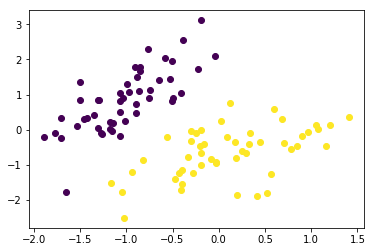

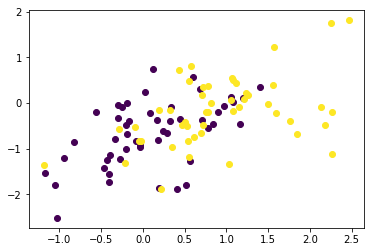

In [2]:
iris = np.genfromtxt("data/iris.txt",delimiter = None)
X, Y =iris[:,0:2], iris[:,-1]
X, Y = ml.shuffleData(X,Y)
X,_ = ml.transforms.rescale(X)

XA, YA = X[Y<2,:], Y[Y<2]
XB, YB = X[Y>0,:], Y[Y>0]

ml.plotClassify2D(None, XA, YA)
plt.show()
ml.plotClassify2D(None, XB, YB)
plt.show()

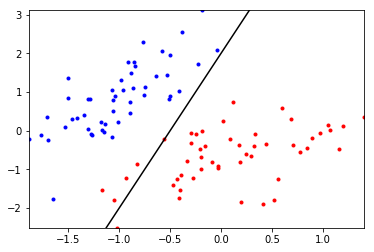

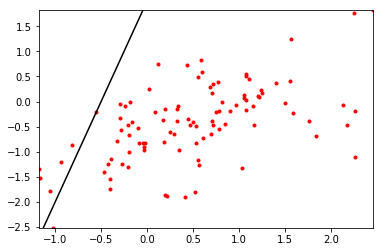

In [3]:
from logisticClassify2 import *

learner = logisticClassify2();
learner.classes = np.unique(YA)
theta = [.5,1,-.25]
wts = np.array([theta[0],theta[1],theta[2]]);
learner.theta = wts;
#code in logisticclassify
#x2b = (-1/self.theta[2])*(self.theta[1]*x1b + self.theta[0])

learner.plotBoundary(XA,YA)
plt.show()
learner.plotBoundary(XB,YB)
plt.show()

In [4]:
YhA = learner.predict(XA)
YhB = learner.predict(XB)

errA = 0.0
errB = 0.0
for i in range(XA.shape[0]):
    if YhA[i] != YA[i]:
        errA += 1
    if YhB[i] != YB[i]:
        errB += 1
errA = errA/XA.shape[0]
errB = errB/XB.shape[0]
print('error rate for first dataset: ', errA)
print('error rate for second dataset: ', errB)
#predict code
#        Yhat = np.zeros(X.shape[0])
#        for i in range(X.shape[0]):
#            response = self.theta[0] + self.theta[1]*X[i,0] + self.theta[2]*X[i,1]
#            if response > 0:
#                Yhat[i] = self.classes[1]
#            else:
#                Yhat[i] = self.classes[0]
#        return Yhat


error rate for first dataset:  0.050505050505050504
error rate for second dataset:  0.5454545454545454


C:\Users\Shah\Documents\178\178-hw3-code\mltools\plot.py:42: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  hld = axis.ishold();
C:\Users\Shah\Documents\178\178-hw3-code\mltools\plot.py:43: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  axis.hold(True);
C:\Users\Shah\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\Shah\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
C:\Users\Shah\Documents\178\178-hw3-code\mltools\plot.py

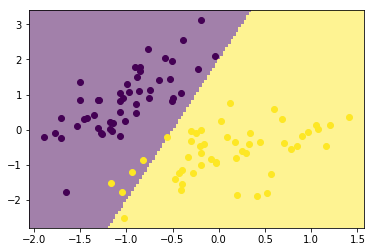

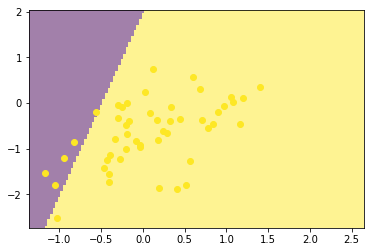

This matches the previous plot


In [5]:
ml.plotClassify2D(learner, XA, YA)
plt.show()
ml.plotClassify2D(learner, XB, YB)
plt.show()

print('This matches the previous plot')

# y(j)*(1-σ(θ*x(j))x1(j)+(1-y(j))*σ(θ*x(j)*x1(j)

Data Set :XA, YA (separable)


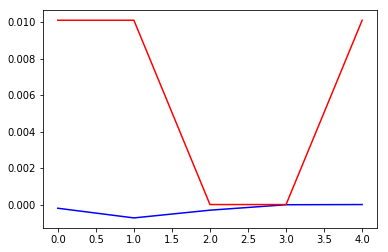

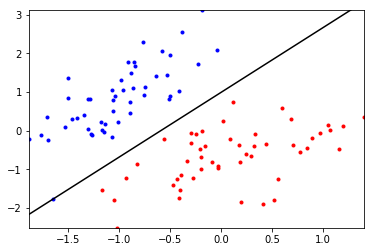

C:\Users\Shah\Documents\178\178-hw3-code\mltools\plot.py:42: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  hld = axis.ishold();
C:\Users\Shah\Documents\178\178-hw3-code\mltools\plot.py:43: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  axis.hold(True);
C:\Users\Shah\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\Shah\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
C:\Users\Shah\Documents\178\178-hw3-code\mltools\plot.py

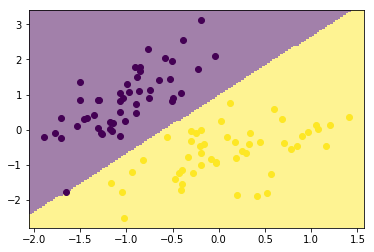

We can see the error(red) slowly decreases as we keep going
Data Set :XB, YB (inseperable)


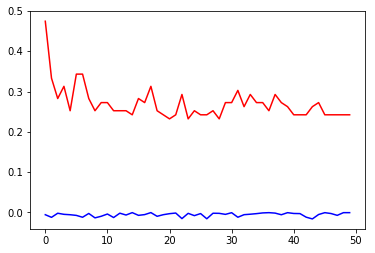

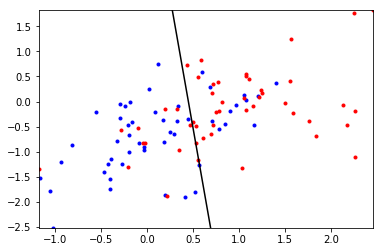

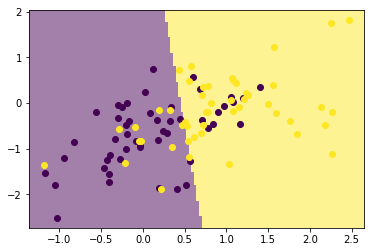

We can see error(red) fluctutate because the error never goes down no matter what happens to theta


In [6]:
'''def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
        """ Train the logistic regression using stochastic gradient descent """
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];
        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri    = self.theta[0] + self.theta[1]*X[i,0] + self.theta[2]*X[i,1];
                si    = self.sigmoid(ri)
                theta1Grad = -YY[i] * (1 - si) + (1 - YY[i]) * si
                theta2Grad = -YY[i] * (1 - si) * X[i,0] 
                           + (1 - YY[i]) * si * X[i,0]
                theta3Grad = -YY[i] * (1 - si) * X[i,1] 
                           + (1 - YY[i]) * si * X[i,1]
                self.theta -= stepsize * gradi;  # take a gradient step

            J01.append( self.err(X,Y) )  # evaluate the current error rate

            ## TODO: compute surrogate loss (logistic negative log-likelihood)
            ## Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
            Jsur = np.sum([np.log(si) if YY[i] == 1 else np.log(1-si)])
            Jnll.append( Jsur/M ) # TODO evaluate the current NLL loss
            plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
            if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
            plt.pause(.01);                    # let OS draw the plot

            ## For debugging: you may want to print current parameters & losses
            # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
            # raw_input()   # pause for keystroke

            # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            if epochs > stopEpochs or np.abs(Jnll[epochs] - Jnll[epochs-1]) < stopTol:
                done = True  # or if Jnll not changing between epochs ( < stopTol )
'''
print('Data Set :XA, YA (separable)')
learnerA = logisticClassify2(XA,YA);
ml.plotClassify2D(learnerA,XA,YA)  
plt.show()
print('We can see the error(red) slowly decreases as we keep going')

print('Data Set :XB, YB (inseperable)')
learnerB = logisticClassify2(XB,YB);
ml.plotClassify2D(learnerB,XB,YB)  
plt.show()
print('We can see error(red) fluctutate because the error never goes down no matter what happens to theta')

2.1

Our plot will then be x = [x,xy]. For class1, our new points would be [-1,1], another point would be [1,1]. For class-1 it would be [1,-1] and [-1,-1]

Our decision line in this case would be y(x2) = 0 
with W = [0, 1] (horizontal line through the origin)

the width:

2/ sqrt(1^2 + 0^2) = 2

the line:
0(x1) + 1x1x2 = 0


2.2: The graph is xy = 0 
![Untitled.png](img/Untitled.png)

2.3: 
![Untitled2.png](img/Untitled2.png)

I used the 4 points, (0,1),(1,0),(1,1),(2,0) and those were the support vectors. I added 1 to all these support vectors for the bias to get the equation:
w0(0) + w1(1) + b = -1 > w1 + b = -1
w0(1) + w1(0) + b = -1 > w0 + b = -1
w0(1) + w1(1) + b = 1 > w1 + w0 + b = 1
w0(2) + w1(0) + b = 1 > 2w0 + b = 1

w0 = 2
w1 = 2
b = -3

line: 2x1+2x2-3 = 0

max width would be 2/sqrt(8) = .707

2.4:
If one of the support vectors are gone, then the width/w's won't change but a minimum of 2 from each class is required. However, with only 2, it might be difficult to find the solution. It is easier to solve the system of equations if there are more support vectors.

3.0: Piazza posts were used a long and I did not collaborate with anyone besides me. I used notes from UCI, MIT, Stanford Class Lectures.